<a href="https://colab.research.google.com/github/shivanichokkam/shivanichokkam/blob/main/Kaggle_Crime_UP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
#loading the dataset into the pandas dataset 
dataset = pd.read_csv('/content/MR data - Compiled Data Set.csv')

In [ ]:
dataset.head(5)

,a,b,c,d,e,f,g,h,i,j,k
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


DELETING COLUMNS THAT ARE OF NO USE

In [ ]:
dataset = dataset.drop(["Title"],axis =1)
dataset = dataset.drop(["Text"],axis=1)

FILL ALL THE NULL VALUES WITH ZERO

In [ ]:
dataset = dataset.fillna(0)


In [ ]:
dataset.describe()

,c,d,e,f,g,h,j,k
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,0.040773,0.221030,0.111588,0.027897,0.021459,0.006438,0.263948,0.201717
std,0.271298,0.521029,0.371563,0.200201,0.184247,0.080063,0.513337,0.461504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,7.000000,4.000000,3.000000,3.000000,1.000000,5.000000,3.000000


CHANGING THE COLUMN HEADERS FOR CONVINIENCE 

In [ ]:
dataset.columns = ["a","b","c","d","e","f","g","h","i","j","k"]

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       466 non-null    object 
 1   b       466 non-null    object 
 2   c       466 non-null    float64
 3   d       466 non-null    float64
 4   e       466 non-null    float64
 5   f       466 non-null    float64
 6   g       466 non-null    float64
 7   h       466 non-null    float64
 8   i       466 non-null    object 
 9   j       466 non-null    float64
 10  k       466 non-null    float64
dtypes: float64(8), object(3)
memory usage: 40.2+ KB
None


CITY WISE CRIME ANALYSIS

In [ ]:
city.head()

Lucknow      202
Ghaziabad    167
Kanpur        97
Name: a, dtype: int64

In [ ]:
city = dataset["a"].value_counts()
print(city)

Lucknow      202
Ghaziabad    167
Kanpur        97
Name: a, dtype: int64


In [ ]:
#converting data into dataframe
city = pd.DataFrame({"Cities": city.index,"No of cases": city.values})
city.head()


,Cities,No of cases
0,Lucknow,202
1,Ghaziabad,167
2,Kanpur,97


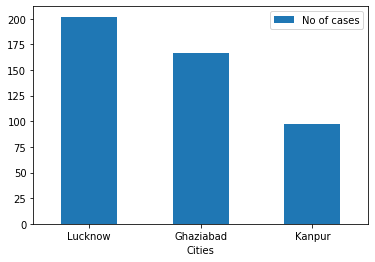

In [ ]:
#plotting
a = city.plot.bar(x = 'Cities', y = 'No of cases', rot = 0)

Reason for murder


In [ ]:
#finding the number of cases for each reason
reason = dataset['b'].value_counts()
print(reason)

0                    319
Unknown reasons       40
Love Affairs          30
Petty Quarrels        19
Personal Vendetta     16
Family Dispute        16
Money Disputes        14
Property Disputes     10
Casteism               2
Name: b, dtype: int64


In [ ]:
#coverting data into dataframe
reason = pd.DataFrame({"Reason": reason.index, "No of cases": reason.values})

In [ ]:
print(reason)

              Reason  No of cases
1    Unknown reasons           40
2       Love Affairs           30
3     Petty Quarrels           19
4  Personal Vendetta           16
5     Family Dispute           16
6     Money Disputes           14
7  Property Disputes           10
8           Casteism            2


In [ ]:
reason = reason.drop(index=0)

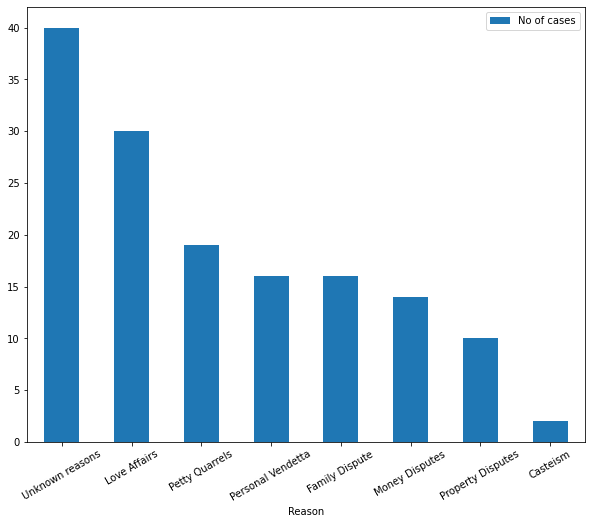

In [ ]:
#plotting the graph(
b = reason.plot.bar(x = "Reason", y ="No of cases", rot = 30, figsize=(10,8))

In [ ]:
#loading the dataset into the pandas dataset 
dataset_reference = pd.read_csv('/content/MR data - Compiled Data Set.csv')

In [ ]:
dataset_reference.head(5)

,City,Title,Text,"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other",Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act,Number of adult victims,Number of childs invoved
0,Ghaziabad,"Minor molests mute girl, sent to observation home",GHAZIABAD: A 12-year-old boy was sent to an ob...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,10",NaN,3.0
1,Ghaziabad,Family out to buy car robbed of Rs 1 lakh by b...,GHAZIABAD: A family that had visited an automo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ghaziabad,"This gang posed as cops to extort youths, couples",GHAZIABAD: Five persons were arrested on Monda...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ghaziabad,"Residents object to loud music, thrashed in Gh...","Ghaziabad: Four tenants, including two soldier...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ghaziabad,Man kills self after being refused money for d...,GHAZIABAD: A 25-year-old allegedly committed s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CRIME AGAINST WOMEN

In [ ]:


#remove the value from the list if it is zero
crimes_list = dataset["i"].tolist()
crimes_list= [i for i in crimes_list if i!= 0]

In [ ]:
print(crimes_list)

['8,10', '10', '9', '9', '4,7', '4', '7', '1,10', '1,10', '8', '3', '7,10', '7,10', '3', '8', '2,3,6', '7', '6', '8', '7', '8', '8', '7', '8', '1,4,10', '2', '2', '2', '5,6', '3', '8', '6', '2', '9', '8', '2', '1, 10', '7,10', '7', '2', '2,3,6', '7,10', '2,3,6', '7,10', '5', '7,10', '8', '7,10', '2,3,6', '7', '6', '2', '2', '8', '6', '7', '7', '8', '8', '8, 10', '8', '6', '11', '8, 10', '7', '2,3', '10', '2', '8', '7,9', '6', '3', '3', '3,7,10', '7,10', '3', '5', '1,10', '7,9', '8,10', '7, 10', '7, 10', '7', '2,6', '8', '1', '7,10', '7,10', '7', '1', '2,6', '7, 10', '8, 10', '8', '8, 10', '8, 10', '7, 10', '8', '2', '11', '11', '3', '2', '4,8', '1', '10', '1', '3,7', '7, 10', '7', '7,10', '1', '7,10', '7,10', '7,10', '1', '9', '3,8', '2,6', '7,8', '1', '1,4', '7', '7,10', '8', '3', '4,7', '6', '8', '8', '8', '3', '3', '8', '3,8', '7', '3', '7,10', '3,8', '3', '8', '8, 10', '6, 8', '7,10', '3', '7,10', '3', '4,7,10', '8,9', '7', '7,8', '1, 10', '8', '8', '8', '7, 10', '8', '7, 10', '7',

In [ ]:
#split all the pairs and add them to the list
crimes = []
for i in crimes_list:
  if ',' in i:
    k=i.split(',')
    temp =[]
    for j in k:
      temp.append(int(j))
    crimes.append(temp)
  else:
    crimes.append(int(i))

In [ ]:
print(crimes)

[[8, 10], 10, 9, 9, [4, 7], 4, 7, [1, 10], [1, 10], 8, 3, [7, 10], [7, 10], 3, 8, [2, 3, 6], 7, 6, 8, 7, 8, 8, 7, 8, [1, 4, 10], 2, 2, 2, [5, 6], 3, 8, 6, 2, 9, 8, 2, [1, 10], [7, 10], 7, 2, [2, 3, 6], [7, 10], [2, 3, 6], [7, 10], 5, [7, 10], 8, [7, 10], [2, 3, 6], 7, 6, 2, 2, 8, 6, 7, 7, 8, 8, [8, 10], 8, 6, 11, [8, 10], 7, [2, 3], 10, 2, 8, [7, 9], 6, 3, 3, [3, 7, 10], [7, 10], 3, 5, [1, 10], [7, 9], [8, 10], [7, 10], [7, 10], 7, [2, 6], 8, 1, [7, 10], [7, 10], 7, 1, [2, 6], [7, 10], [8, 10], 8, [8, 10], [8, 10], [7, 10], 8, 2, 11, 11, 3, 2, [4, 8], 1, 10, 1, [3, 7], [7, 10], 7, [7, 10], 1, [7, 10], [7, 10], [7, 10], 1, 9, [3, 8], [2, 6], [7, 8], 1, [1, 4], 7, [7, 10], 8, 3, [4, 7], 6, 8, 8, 8, 3, 3, 8, [3, 8], 7, 3, [7, 10], [3, 8], 3, 8, [8, 10], [6, 8], [7, 10], 3, [7, 10], 3, [4, 7, 10], [8, 9], 7, [7, 8], [1, 10], 8, 8, 8, [7, 10], 8, [7, 10], 7, 8, 8, 6, 8, 6, 10, [7, 10], 8, 8, 7, 6, 8, 6, 6, 6, [8, 10], [1, 10], 8, 10, 9, 8, 9, 8, 1, 8, 8, 8, 8, 8, 8, 1, 9, 8, 8, 7, 1, 7, 7, 

In [ ]:
#li contains the no.of crimes commited against women divided act-wise
li = 11*[0]

for i in crimes:
  if type(i) == list:
    for j in i:
      li[j-1]= li[j-1]+1
  else:
    li[i-1]= li[i-1]+1
      
print(li)

print(range(len(li)))



[19, 19, 25, 7, 3, 22, 55, 63, 10, 49, 3]
range(0, 11)


In [ ]:
print(li)
print(len(li))

[19, 19, 25, 7, 3, 22, 55, 63, 10, 49, 3]
11


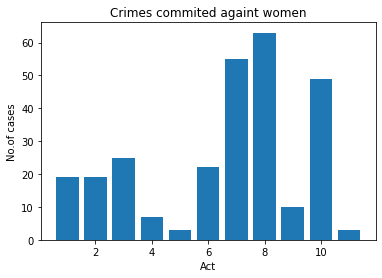

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [ ]:
x=[]
for i in range(len(li)):
  x.append(i+1)
plt.bar(x,li)
plt.xlabel('Act')
plt.ylabel('No.of cases')
plt.title('Crimes commited againt women')
plt.show()

print(x)